In [11]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [10]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/frxmenatc/NIDA_6620412010_DADS-7203_Word-Embedding/main/TaylorSwift.csv')
data.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,1,Taylor Swift,A Monster In My Closet!,NaN,2000,1/1/2000,there's a monster in my closet and i don't kno...
1,2,Taylor Swift,​epiphany (the long pond studio sessions),folklore: the long pond studio sessions (from ...,2002,25/11/2002,keep your helmet keep your life son just a fle...
2,3,Taylor Swift,Dark Blue Tennessee,2004-2005 Demo CD,2004,1/1/2004,he said i got me a nice new apartment in the c...
3,4,Taylor Swift,All Night Diner,Unreleased Songs,2005,1/1/2005,i wake up i stretch out i wonder what you're d...
4,5,Taylor Swift,Teardrops on My Guitar,Taylor Swift,2006,24/10/2006,drew looks at me i fake a smile so he won't se...


# **Clean Data**

In [6]:
df = data.dropna(subset=['Lyric'])
df1 = df[df['Year'] <= 2015].reset_index(drop=True)
group1 = df1['Lyric']
df2 = df[df['Year'] > 2015].reset_index(drop=True)
group2 = df2['Lyric']

# **Group1: <= 2015**



In [7]:
stop_words=set(stopwords.words("english"))
print(stop_words)
print(len(stop_words))

{'were', 'y', "she'd", 'hadn', "you'll", 'me', "shan't", 'this', "wouldn't", 'they', "wasn't", 'my', 'more', 'and', "isn't", 'for', 'our', "you're", "i'd", 'at', "he'll", 'we', 'being', "she'll", 'no', 'other', 'but', 'until', 'yourself', 'of', 'about', 'needn', 'ain', 'once', 'was', 'am', 'you', 'didn', 'been', 'during', 'further', 'should', 'only', 'over', 'against', 'ma', 'just', 'own', "we'll", "you'd", "they'd", 'isn', "they'll", 'such', 'which', "they're", "i'm", 'too', 'most', "he's", 'shan', 'have', 'each', 'here', 'why', "it'd", 'wouldn', "mightn't", "shouldn't", 'myself', 're', 'down', 'ours', "don't", "couldn't", 'then', 'not', 'yours', "doesn't", 'are', 'so', "won't", 'an', "aren't", 'through', 'because', 'very', 'doesn', 'than', 'her', 'some', 'that', 'under', 'with', 'itself', 'mightn', 'ourselves', "mustn't", 'theirs', "we'd", 'hers', 've', "we've", 'the', 'mustn', "needn't", 's', 'few', "haven't", 'out', "he'd", "it's", 'those', 'all', 'themselves', 'nor', 'shouldn', 'a

**Select columns and  Delete Stopwords for Group 1**

In [8]:
# Store them in the pandas dataframe, resetting the index for df1
group1_clean = pd.DataFrame(group1.reset_index(drop=True))  # reset index to avoid potential conflicts
group1_clean = group1_clean.rename(columns={0: 'Lyric'}) # Rename the '0' column to 'Lyric'
print(group1_clean)

stop_words=set(stopwords.words("english"))
sent1 = []  # Initialize an empty list to store results

for row in group1_clean['Lyric']:
    words = row.split(' ')
    filtered_words = []  # Initialize an empty list for each row's filtered words
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    sent1.append(filtered_words)  # Append the filtered words for the current row to the result list

# Display the first 3 rows of the result
sent1[:3]

                                                 Lyric
0    there's a monster in my closet and i don't kno...
1    keep your helmet keep your life son just a fle...
2    he said i got me a nice new apartment in the c...
3    i wake up i stretch out i wonder what you're d...
4    drew looks at me i fake a smile so he won't se...
..                                                 ...
179  i want to thank the fans for the last 0 years ...
180  enchanted this night is sparkling don't you le...
181  5 may 05 las vegas  ed sheeran  tenerife sea  ...
182  he said let's get out of this town drive out o...
183  i write this to explain why ill be holding bac...

[184 rows x 1 columns]


[["there's",
  'monster',
  'closet',
  'know',
  'ever',
  'seen',
  'ever',
  'pounced',
  'wonder',
  'looks',
  'like',
  'purple',
  'red',
  'eyes',
  'wonder',
  'likes',
  'eat',
  'size',
  'tonight',
  'gonna',
  'catch',
  'set',
  'real',
  'big',
  'trap',
  'train',
  'really',
  'well',
  'answer',
  'clap',
  '',
  'looked',
  'closet',
  'nothing',
  'stuff',
  'know',
  "monster's",
  'heard',
  'huff',
  'puff',
  'could',
  'wants',
  'eat',
  'maybe',
  'favorite',
  'tray',
  'comes',
  'get',
  'scream',
  'loudly',
  'go',
  'away',
  'nice',
  'name',
  'happy',
  'bad',
  'name',
  'grouch',
  'suspect',
  'leaving',
  '',
  'kick'],
 ['keep',
  'helmet',
  'keep',
  'life',
  'son',
  'flesh',
  'wound',
  "here's",
  'rifle',
  'crawling',
  'beaches',
  'sir',
  'think',
  'bleeding',
  'things',
  "can't",
  'speak',
  '',
  '',
  'serve',
  'fall',
  'watch',
  'breathe',
  'watch',
  'breathing',
  '',
  '',
  'something',
  'med',
  'school',
  'cover',

**Word2Vec by use skip-gram for Group 1**

In [ ]:
model1 = Word2Vec(sent1, min_count=1,workers=3, window =3, sg = 1) #sg = 1 is skip-gram ,sg= 0 is CBOW (default)
print(model1)

In [ ]:
model1.wv.most_similar('love')[:5]

[('want', 0.9704050421714783),
 ('girl', 0.9615161418914795),
 ('clean', 0.9597985744476318),
 ('finally', 0.9586110711097717),
 ('ohoh', 0.9565843939781189)]

In [ ]:
model1.wv.most_similar('break')[:5]

[('heart', 0.9770767092704773),
 ('perfectly', 0.973980724811554),
 ('blink', 0.9718619585037231),
 ('enough', 0.969967246055603),
 ('anymore', 0.9655104875564575)]

In [ ]:
model1.wv.most_similar('perfect')[:5]

[('strange', 0.9982073307037354),
 ('comes', 0.9981194138526917),
 ('house', 0.9980909824371338),
 ('losing', 0.9980642199516296),
 ('sick', 0.9980521202087402)]

In [ ]:
model1.wv.most_similar('night')[:5]

[('sparkling', 0.993973433971405),
 ('wonderstruck', 0.9915057420730591),
 ('style', 0.9912192225456238),
 ('free', 0.9907448887825012),
 ('caught', 0.9906625747680664)]

In [ ]:
model1.wv.most_similar('heart')[:5]

[('win', 0.9823760390281677),
 ('perfectly', 0.9816139340400696),
 ('question', 0.9787667393684387),
 ('blink', 0.9783468842506409),
 ('make', 0.9780298471450806)]

**Represent Group 1 (top 5 of most similarities of “love”, “break”, “perfect”, “night” and “heart)**”

In [ ]:
# List of target words
target_words = ['love', 'break', 'perfect', 'night', 'heart']

# Dictionary to store results
similar_words_dict = {}

# Get the top 5 similar words with their similarity scores for each target word
for word in target_words:
    similar_words = model1.wv.most_similar(word, topn=5)
    # Include both word and similarity score (formatted to 3 decimal places)
    similar_words_dict[word] = [f"{w[0]} ({w[1]:.3f})" for w in similar_words]

# Create a DataFrame from the dictionary
df_similar_words = pd.DataFrame(similar_words_dict)

# Add a row index for "Rank" (1 to 5)
df_similar_words.index = [f"Rank {i+1}" for i in range(5)]

# Display the table
print("Top 5 Similar Words with Similarity Scores for Group 1:")
print(df_similar_words)


Top 5 Similar Words with Similarity Scores for Group 1:
                   love              break          perfect  \
Rank 1     want (0.970)      heart (0.977)  strange (0.998)   
Rank 2     girl (0.962)  perfectly (0.974)    comes (0.998)   
Rank 3    clean (0.960)      blink (0.972)    house (0.998)   
Rank 4  finally (0.959)     enough (0.970)   losing (0.998)   
Rank 5     ohoh (0.957)    anymore (0.966)     sick (0.998)   

                       night              heart  
Rank 1     sparkling (0.994)        win (0.982)  
Rank 2  wonderstruck (0.992)  perfectly (0.982)  
Rank 3         style (0.991)   question (0.979)  
Rank 4          free (0.991)      blink (0.978)  
Rank 5        caught (0.991)       make (0.978)  


**Plot Data Group 1**

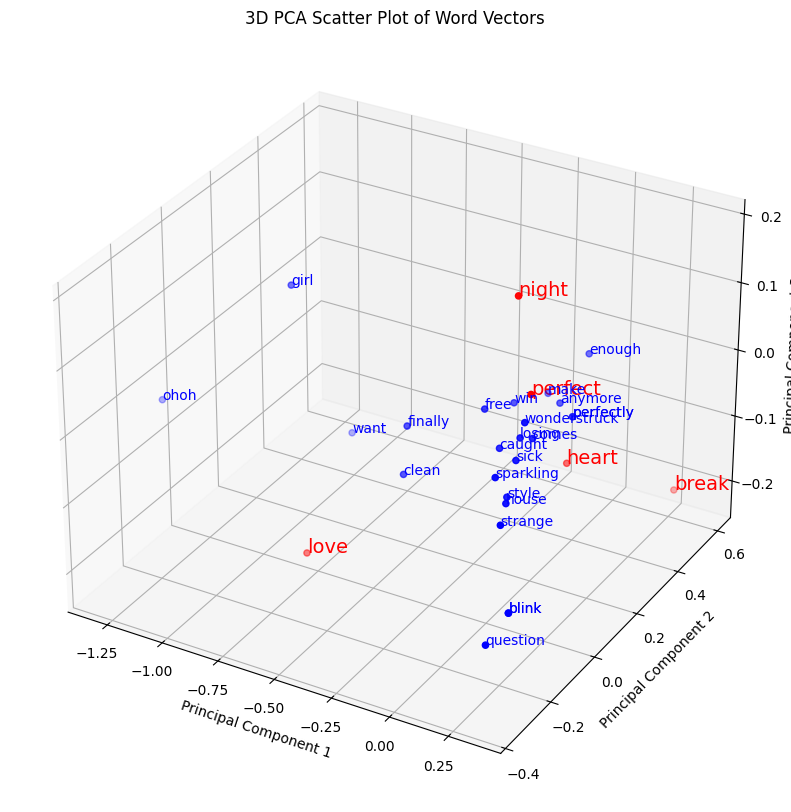

In [ ]:
# Assume model1.wv is a pre-trained Word2Vec model
# Get the top 5 similar words for each main word using Word2Vec's most_similar method
group1_similar_love = [word for word, _ in model1.wv.most_similar('love')[:5]]
group1_similar_break = [word for word, _ in model1.wv.most_similar('break')[:5]]
group1_similar_perfect = [word for word, _ in model1.wv.most_similar('perfect')[:5]]
group1_similar_night = [word for word, _ in model1.wv.most_similar('night')[:5]]
group1_similar_heart = [word for word, _ in model1.wv.most_similar('heart')[:5]]

# Define the main words we are focusing on
main_words = ['love', 'break', 'perfect', 'night', 'heart']

# Combine all similar words into a single list
similar_words = group1_similar_love + group1_similar_break + group1_similar_perfect + group1_similar_night + group1_similar_heart

# Create a unified list of all unique words, prioritizing main_words
all_words = main_words + [word for word in similar_words if word not in main_words]

# Create a matrix of word vectors for all unique words
word_matrix = np.array([model1.wv[word] for word in all_words])

# Perform PCA to reduce dimensionality to 3D (instead of 2D)
pca = PCA(n_components=3)  # Change to 3 components
# Fit and transform the word_matrix to get 3D coordinates
pca_result = pca.fit_transform(word_matrix)

# Get indices for main_words and similar_words in the all_words list
main_indices = [all_words.index(word) for word in main_words]
# - similar_indices: positions of all other words (not in main_words)
similar_indices = [i for i in range(len(all_words)) if i not in main_indices]

# Create the 3D plot with a specified figure size
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')  # Add 3D axes

# Plot main_words in red
ax.scatter(pca_result[main_indices, 0], pca_result[main_indices, 1], pca_result[main_indices, 2],
           marker='o', color='red')
# Annotate each main word with its label
for i, word in enumerate(main_words):
    ax.text(pca_result[main_indices[i], 0], pca_result[main_indices[i], 1], pca_result[main_indices[i], 2],
            word, color='red', fontsize=14)

# Plot similar_words in blue
ax.scatter(pca_result[similar_indices, 0], pca_result[similar_indices, 1], pca_result[similar_indices, 2],
           marker='o', color='blue')
# Annotate each similar word with its label
for i, word in enumerate([all_words[i] for i in similar_indices]):
    ax.text(pca_result[similar_indices[i], 0], pca_result[similar_indices[i], 1], pca_result[similar_indices[i], 2],
            word, color='blue')

# Set plot details
ax.set_xlabel("Principal Component 1")  # Label for x-axis
ax.set_ylabel("Principal Component 2")  # Label for y-axis
ax.set_zlabel("Principal Component 3")  # Label for z-axis
ax.set_title("3D PCA Scatter Plot of Word Vectors")  # Title of the plot

# Display the plot
plt.show()

# **Group2: >2015**

**Select columns and  Delete Stopwords for  Group 2**

In [ ]:
# Store them in the pandas dataframe, resetting the index for df2
group2_clean = pd.DataFrame(group2.reset_index(drop=True))  # reset index to avoid potential conflicts
group2_clean = group2_clean.rename(columns={0: 'Lyric'}) # Rename the '0' column to 'Lyric'
print(group2_clean)

stop_words=set(stopwords.words("english"))
sent2 = []  # Initialize an empty list to store results

for row in group2_clean['Lyric']:
    words = row.split(' ')
    filtered_words = []  # Initialize an empty list for each row's filtered words
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    sent2.append(filtered_words)  # Append the filtered words for the current row to the result list

# Display the first 3 rows of the result
sent2[:3]

                                                 Lyric
0    baby this is what you came for lightning strik...
1    search  where is the video of kanye telling me...
2    i don't like your little games don't like your...
3    taylor swift  future i wanna be your end game ...
4    knew he was a killer first time that i saw him...
..                                                 ...
146  spoken  it's jingleball theres santa hats ever...
147  to put it plainly we just couldnt stop writing...
148  zwrotka  siedzę i patrzę jak czytasz z głową p...
149  friends break up friends get married strangers...
150  when the dinner is cold and the chatter gets o...

[151 rows x 1 columns]


[['baby',
  'came',
  'lightning',
  'strikes',
  'every',
  'time',
  'moves',
  "everybody's",
  'watching',
  'looking',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  '',
  '',
  'baby',
  'came',
  'lightning',
  'strikes',
  'every',
  'time',
  'moves',
  "everybody's",
  'watching',
  'looking',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  '',
  'verse',
  'go',
  'fast',
  'game',
  'play',
  'knows',
  'gotta',
  'way',
  'say',
  'nothing',
  'need',
  'say',
  'place',
  'leave',
  '',
  '',
  'baby',
  'came',
  'lightning',
  'strikes',
  'every',
  'time',
  'moves',
  "everybody's",
  'watching',
  'looking',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh'],
 ['search',
  '',
  'video',
  'kanye',
  'telling',
  'going',
  'call',
  'bitch',
  'song',
  'exist',
  'never',
 

**Word2Vec by use skip-gram for Group 2**

In [ ]:
model2 = Word2Vec(sent2, min_count=1,workers=3, window =3, sg = 1) #sg = 1 is skip-gram ,sg= 0 is CBOW (default)
print(model2)

Word2Vec<vocab=4762, vector_size=100, alpha=0.025>


In [ ]:
model2.wv.most_similar('love')[:5]

[("ain't", 0.9921234846115112),
 ("'em", 0.989567756652832),
 ('talk', 0.9885526895523071),
 ('team', 0.9869396686553955),
 ('fire', 0.9868134260177612)]

In [ ]:
model2.wv.most_similar('break')[:5]

[("here's", 0.9962261915206909),
 ('care', 0.9960737824440002),
 ('audience', 0.9960328936576843),
 ('house', 0.995848536491394),
 ('dance', 0.9958400130271912)]

In [ ]:
model2.wv.most_similar('perfect')[:5]

[('someone', 0.9972096681594849),
 ('mess', 0.997003436088562),
 ('crowds', 0.9969447255134583),
 ('likes', 0.9968699216842651),
 ('pop', 0.9968056082725525)]

In [ ]:
model2.wv.most_similar('night')[:5]

[('dreams', 0.9926713109016418),
 ('middle', 0.9886654615402222),
 ('golden', 0.98698890209198),
 ('gotta', 0.9865294098854065),
 ('twisted', 0.9858102798461914)]

In [ ]:
model2.wv.most_similar('heart')[:5]

[('heaven', 0.9976422786712646),
 ('told', 0.997480034828186),
 ('king', 0.9971953630447388),
 ('saying', 0.9971871972084045),
 ('blue', 0.9970784187316895)]

**Represent Group 2 (top 5 of most similarities of “love”, “break”, “perfect”, “night” and “heart)**”

In [ ]:
# List of target words
target_words = ['love', 'break', 'perfect', 'night', 'heart']

# Dictionary to store results
similar_words_dict = {}

# Get the top 5 similar words with their similarity scores for each target word
for word in target_words:
    similar_words = model2.wv.most_similar(word, topn=5)
    # Include both word and similarity score (formatted to 3 decimal places)
    similar_words_dict[word] = [f"{w[0]} ({w[1]:.3f})" for w in similar_words]

# Create a DataFrame from the dictionary
df_similar_words_group2 = pd.DataFrame(similar_words_dict)

# Add a row index for "Rank" (1 to 5)
df_similar_words_group2.index = [f"Rank {i+1}" for i in range(5)]

# Display the table
print("Top 5 Similar Words with Similarity Scores for Group 2:")
print(df_similar_words_group2)


Top 5 Similar Words with Similarity Scores for Group 2:
                 love             break          perfect            night  \
Rank 1  ain't (0.992)    here's (0.996)  someone (0.997)   dreams (0.993)   
Rank 2    'em (0.990)      care (0.996)     mess (0.997)   middle (0.989)   
Rank 3   talk (0.989)  audience (0.996)   crowds (0.997)   golden (0.987)   
Rank 4   team (0.987)     house (0.996)    likes (0.997)    gotta (0.987)   
Rank 5   fire (0.987)     dance (0.996)      pop (0.997)  twisted (0.986)   

                 heart  
Rank 1  heaven (0.998)  
Rank 2    told (0.997)  
Rank 3    king (0.997)  
Rank 4  saying (0.997)  
Rank 5    blue (0.997)  


**Plot Data Group2**

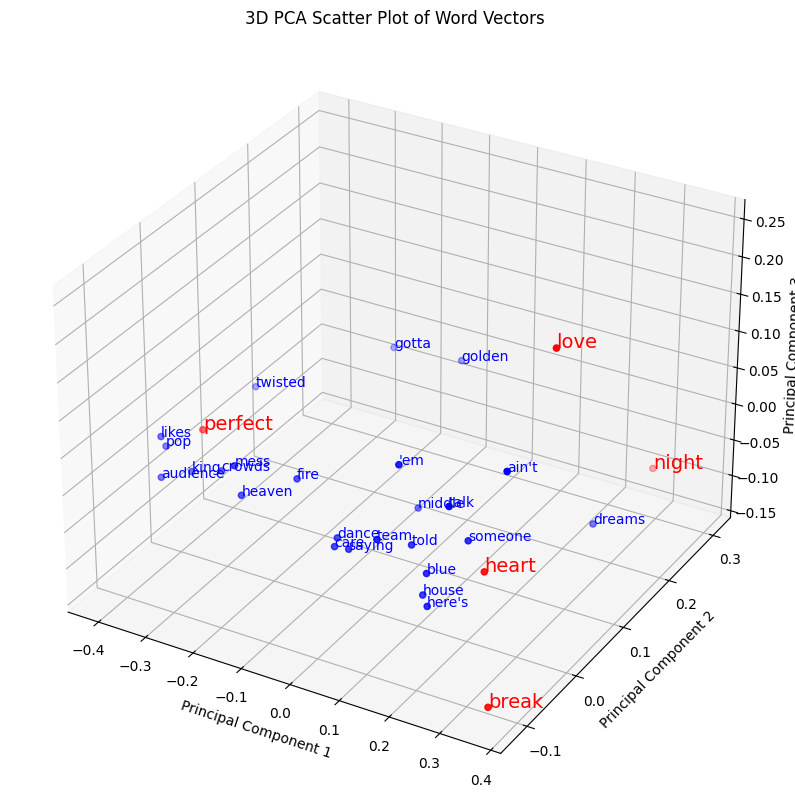

In [ ]:
# Assume model2.wv is a pre-trained Word2Vec model
# Get the top 5 similar words for each main word using Word2Vec's most_similar method
group2_similar_love = [word for word, _ in model2.wv.most_similar('love')[:5]]
group2_similar_break = [word for word, _ in model2.wv.most_similar('break')[:5]]
group2_similar_perfect = [word for word, _ in model2.wv.most_similar('perfect')[:5]]
group2_similar_night = [word for word, _ in model2.wv.most_similar('night')[:5]]
group2_similar_heart = [word for word, _ in model2.wv.most_similar('heart')[:5]]

# Define the main words we are focusing on
main_words2 = ['love', 'break', 'perfect', 'night', 'heart']

# Combine all similar words into a single list
similar_words2 = group2_similar_love + group2_similar_break + group2_similar_perfect + group2_similar_night + group2_similar_heart

# Create a unified list of all unique words, prioritizing main_words
all_words2 = main_words2 + [word for word in similar_words2 if word not in main_words2]

# Create a matrix of word vectors for all unique words
word_matrix2 = np.array([model2.wv[word] for word in all_words2])

# Perform PCA to reduce dimensionality to 3D (instead of 2D)
pca2 = PCA(n_components=3)  # Change to 3 components
# Fit and transform the word_matrix to get 3D coordinates
pca_result2 = pca2.fit_transform(word_matrix2)

# Get indices for main_words and similar_words in the all_words list
main_indices2 = [all_words2.index(word) for word in main_words2]  # Fixed 'all_words' to 'all_words2'
similar_indices2 = [i for i in range(len(all_words2)) if i not in main_indices2]

# Create the 3D plot with a specified figure size
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')  # Add 3D axes

# Plot main_words in red
ax.scatter(pca_result2[main_indices2, 0], pca_result2[main_indices2, 1], pca_result2[main_indices2, 2],
           marker='o', color='red')
# Annotate each main word with its label
for i, word in enumerate(main_words2):
    ax.text(pca_result2[main_indices2[i], 0], pca_result2[main_indices2[i], 1], pca_result2[main_indices2[i], 2],
            word, color='red', fontsize=14)

# Plot similar_words in blue
ax.scatter(pca_result2[similar_indices2, 0], pca_result2[similar_indices2, 1], pca_result2[similar_indices2, 2],
           marker='o', color='blue')
# Annotate each similar word with its label
for i, word in enumerate([all_words2[i] for i in similar_indices2]):
    ax.text(pca_result2[similar_indices2[i], 0], pca_result2[similar_indices2[i], 1], pca_result2[similar_indices2[i], 2],
            word, color='blue')

# Set plot details
ax.set_xlabel("Principal Component 1")  # Label for x-axis
ax.set_ylabel("Principal Component 2")  # Label for y-axis
ax.set_zlabel("Principal Component 3")  # Label for z-axis
ax.set_title("3D PCA Scatter Plot of Word Vectors")  # Title of the plot

# Display the plot
plt.show()